In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [2]:
#read data from csv
data = pd.read_csv("./sentiment_analysis.csv", encoding = "ISO-8859-1")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
plot_size = plt.rcParams["figure.figsize"]
plot_size = [15,20]
print(plot_size)

[15, 20]


<AxesSubplot:ylabel='airline'>

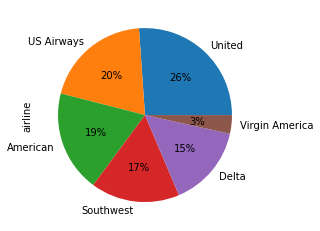

In [4]:
#doing exploratory data analysis
data['airline'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

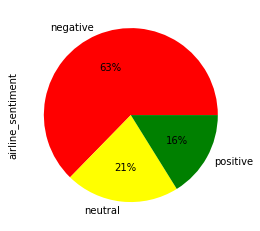

In [5]:
#plotting all the sentiments
data['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [6]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

<AxesSubplot:xlabel='airline'>

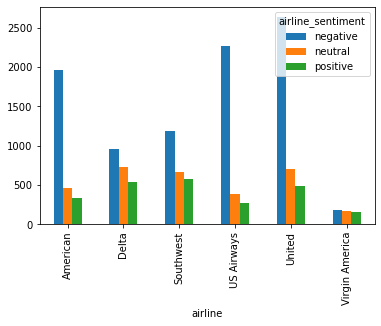

In [7]:
airline_sentiment.plot(kind='bar')

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

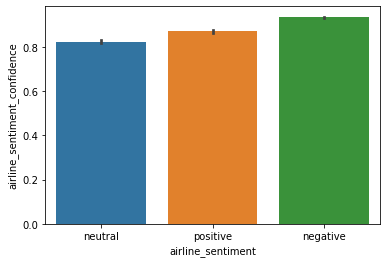

In [8]:
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=data)

In [9]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
#Lets divide the data into features and target values
features = data['text']
target = data['airline_sentiment']

In [11]:
print(features)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#Tokenisation of data
data['text'] = data['text'].apply(nltk.word_tokenize)

In [14]:
#removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#removing stopwords and converting to lowercase
data['text'] = data['text'].apply(lambda x: [item.lower() for item in x if item not in stop])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#removing special characters
data['text'] = data['text'].apply(lambda x: [item for item in x if item.isalpha()])

In [16]:
#Lemmatise the words (reduce the different words to its dictionary form)
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Deena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
#Let's get the required columns only
data = data[['text','airline_sentiment']]

In [19]:
#converting column of list to column of text
data['text'] = [','.join(map(str, l)) for l in data['text']]

In [20]:
data['text']

0                         VirginAmerica,What,dhepburn,said
1        VirginAmerica,plus,you,added,commercial,to,the...
2        VirginAmerica,I,did,today,Must,mean,I,need,to,...
3        VirginAmerica,it,really,aggressive,to,blast,ob...
4        VirginAmerica,and,it,a,really,big,bad,thing,ab...
                               ...                        
14635    AmericanAir,thank,you,we,got,on,a,different,fl...
14636    AmericanAir,leaving,over,minute,Late,Flight,No...
14637        AmericanAir,Please,bring,American,Airlines,to
14638    AmericanAir,you,have,my,money,you,change,my,fl...
14639    AmericanAir,we,have,ppl,so,we,need,know,how,ma...
Name: text, Length: 14640, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(data['text'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
#split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, data['airline_sentiment'], test_size=0.2, random_state = 1)

In [24]:
#Lets fit it in model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_trained = lr.fit(X_train, y_train)
y_pred = lr_trained.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
acc_score

K:\MachineLearning\logistic_regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.796448087431694

In [27]:
#using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, random_state=0)
RF_trained = RF.fit(X_train, y_train)
rf_preds = RF_trained.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_preds)
rf_acc_score

0.75

In [34]:
from textblob import TextBlob
data['sentiment'] = data['text'].apply(lambda x : (TextBlob(x).sentiment)[0])
data['sentiment']

In [84]:
#creating wordcloud for visulatization
wordcloud_comment = ' '.join(data['text'].tolist())
wordcloud_comment = wordcloud_comment.replace(' ', ',')

In [94]:
from collections import Counter
counted_text = [word for word in wordcloud_comment.split(',') if word.lower() not in stop]
Counter = Counter(counted_text).most_common(20)

In [95]:
Counter

[('united', 3828),
 ('flight', 3772),
 ('USAirways', 2935),
 ('AmericanAir', 2925),
 ('SouthwestAir', 2407),
 ('JetBlue', 2287),
 ('wa', 1628),
 ('get', 1332),
 ('http', 1210),
 ('hour', 1106),
 ('Cancelled', 1056),
 ('service', 949),
 ('time', 923),
 ('customer', 877),
 ('u', 782),
 ('bag', 739),
 ('Flight', 736),
 ('help', 732),
 ('plane', 701),
 ('amp', 683)]

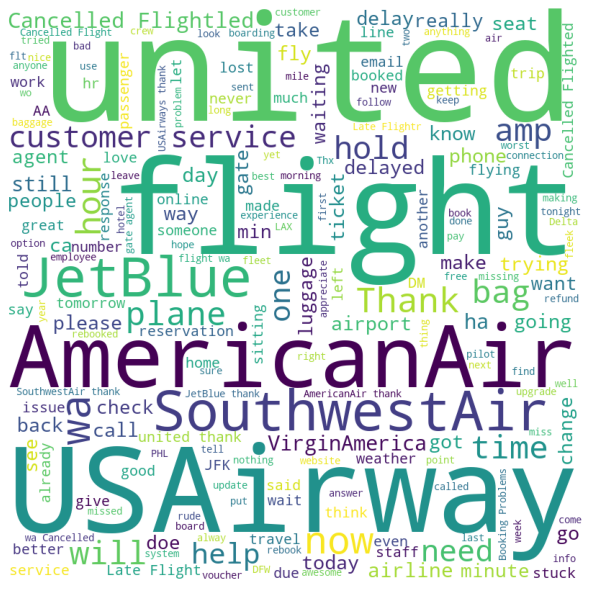

In [103]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(wordcloud_comment) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [104]:
#Saving it to a file
wordcloud.to_file("airline.png")